# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

It represents 17 marketing campaigns!

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')
import time

In [510]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [511]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [512]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [513]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [514]:
# Check for missing values and print them out in a table

total_missing = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(25)

,Total,%
age,0,0.0
campaign,0,0.0
nr.employed,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0
cons.price.idx,0,0.0
emp.var.rate,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0


In [515]:
#Trying to find some strange values or null values
maxage = df['age'].max()
minage = df['age'].min()

print(f'The oldest is {maxage} years old.')
print(f'The youngest is {minage} years old.')

The oldest is 98 years old.
The youngest is 17 years old.


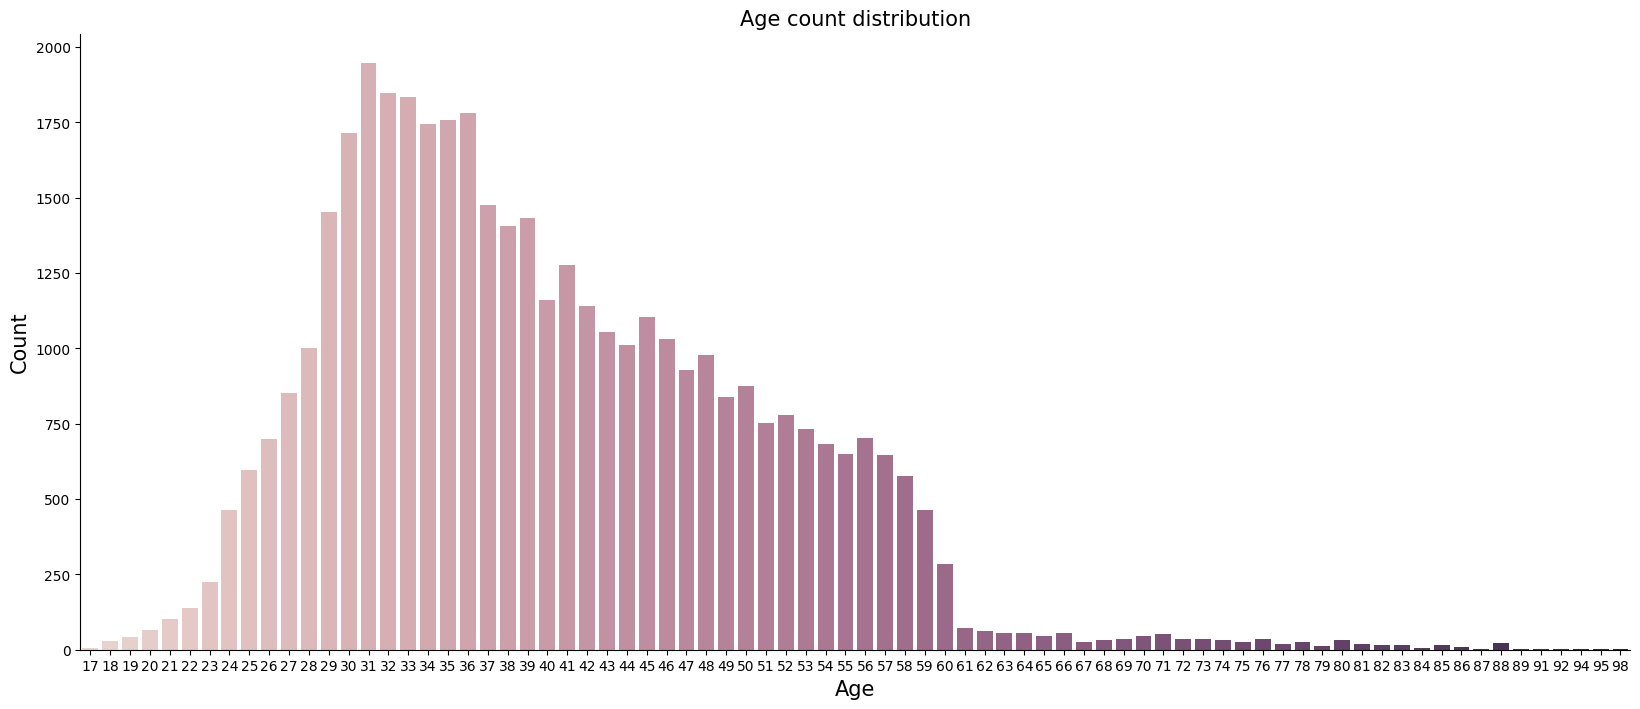

In [516]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x ='age',data=df,hue='age',legend=False)
ax.set_xlabel('Age',fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.set_title('Age count distribution',fontsize=15)
sns.despine()

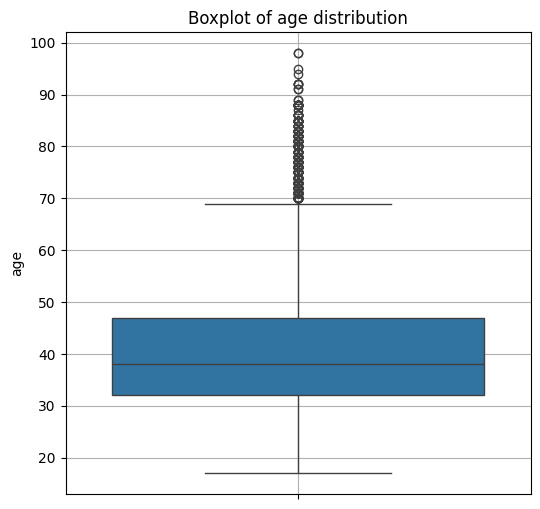

In [517]:
plt.figure(figsize=(6,6))
sns.boxplot(df['age'])
plt.title('Boxplot of age distribution')
plt.ylabel('age')
plt.grid(True)
plt.savefig('data/images/boxplotofagedistribution.png',dpi=100,bbox_inches = 'tight')
plt.show()

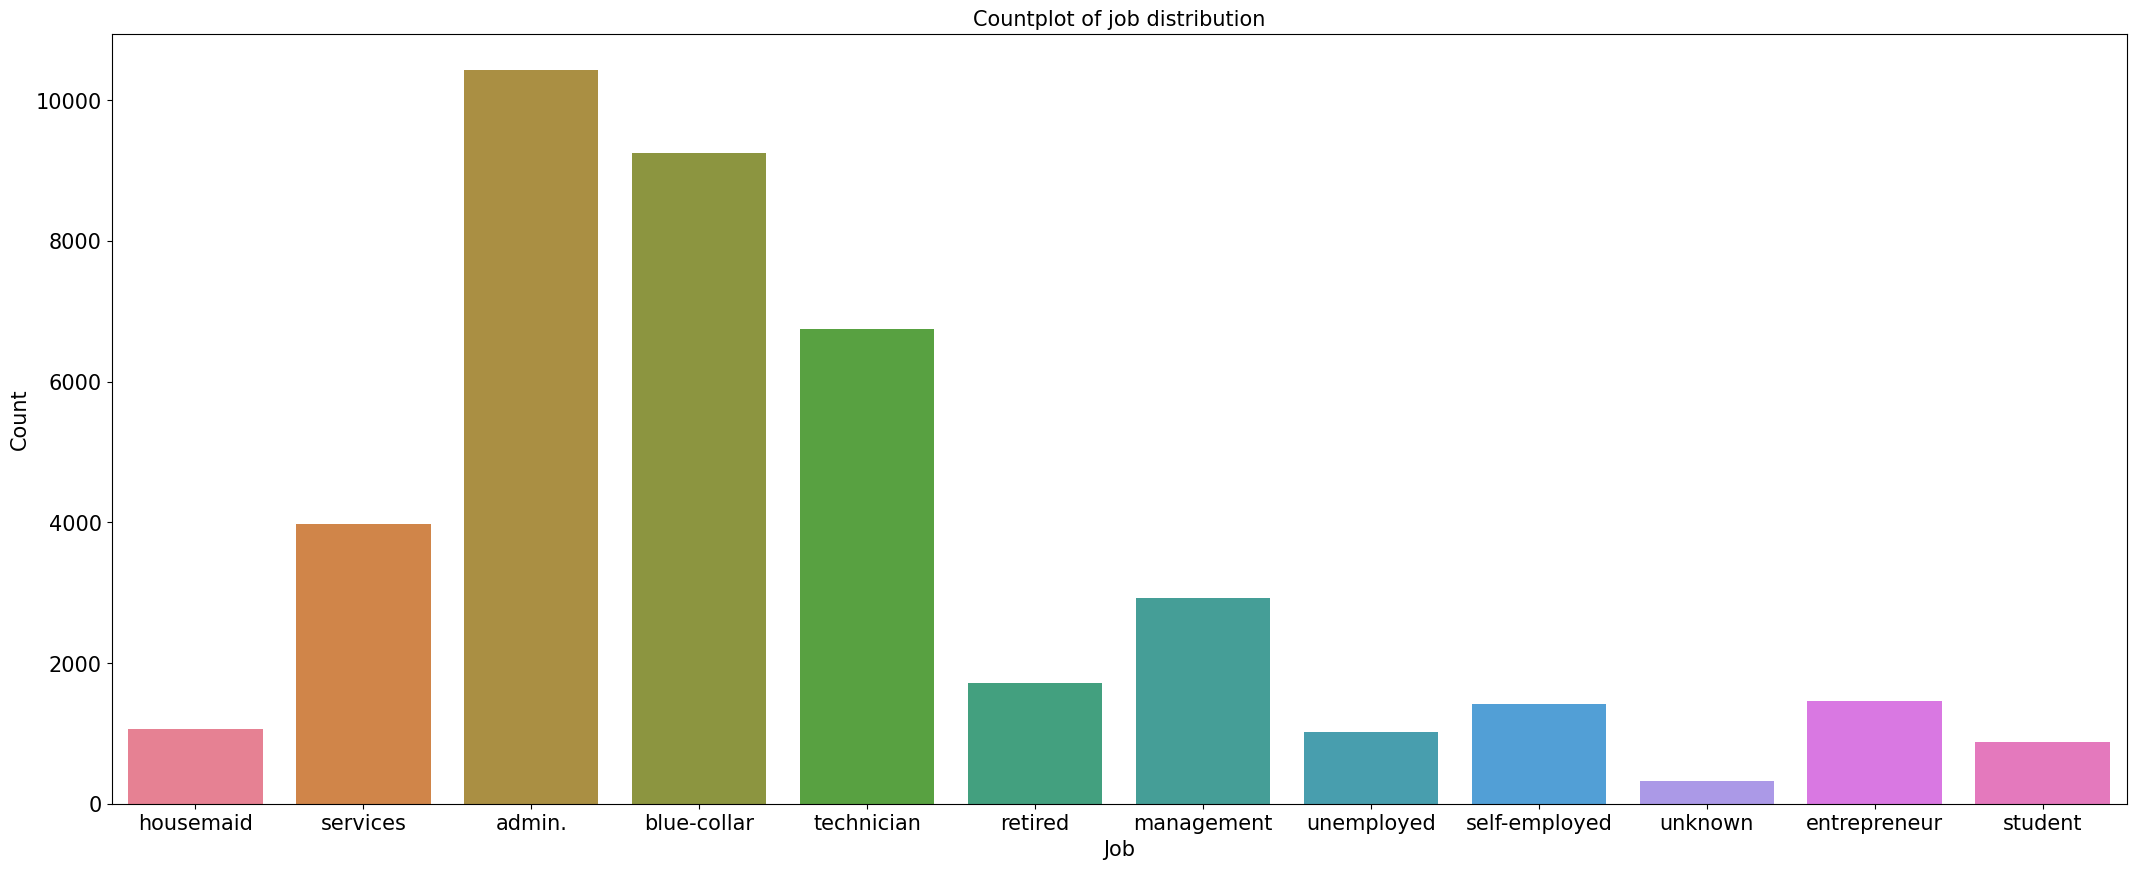

In [518]:
fig, ax = plt.subplots()
fig.set_size_inches(26, 10)
sns.countplot(x='job',data =df,hue='job')
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Countplot of job distribution', fontsize=15)
ax.tick_params(labelsize=15)
plt.savefig('data/images/countplotoftypesofjobs.png',dpi=100,bbox_inches = 'tight')

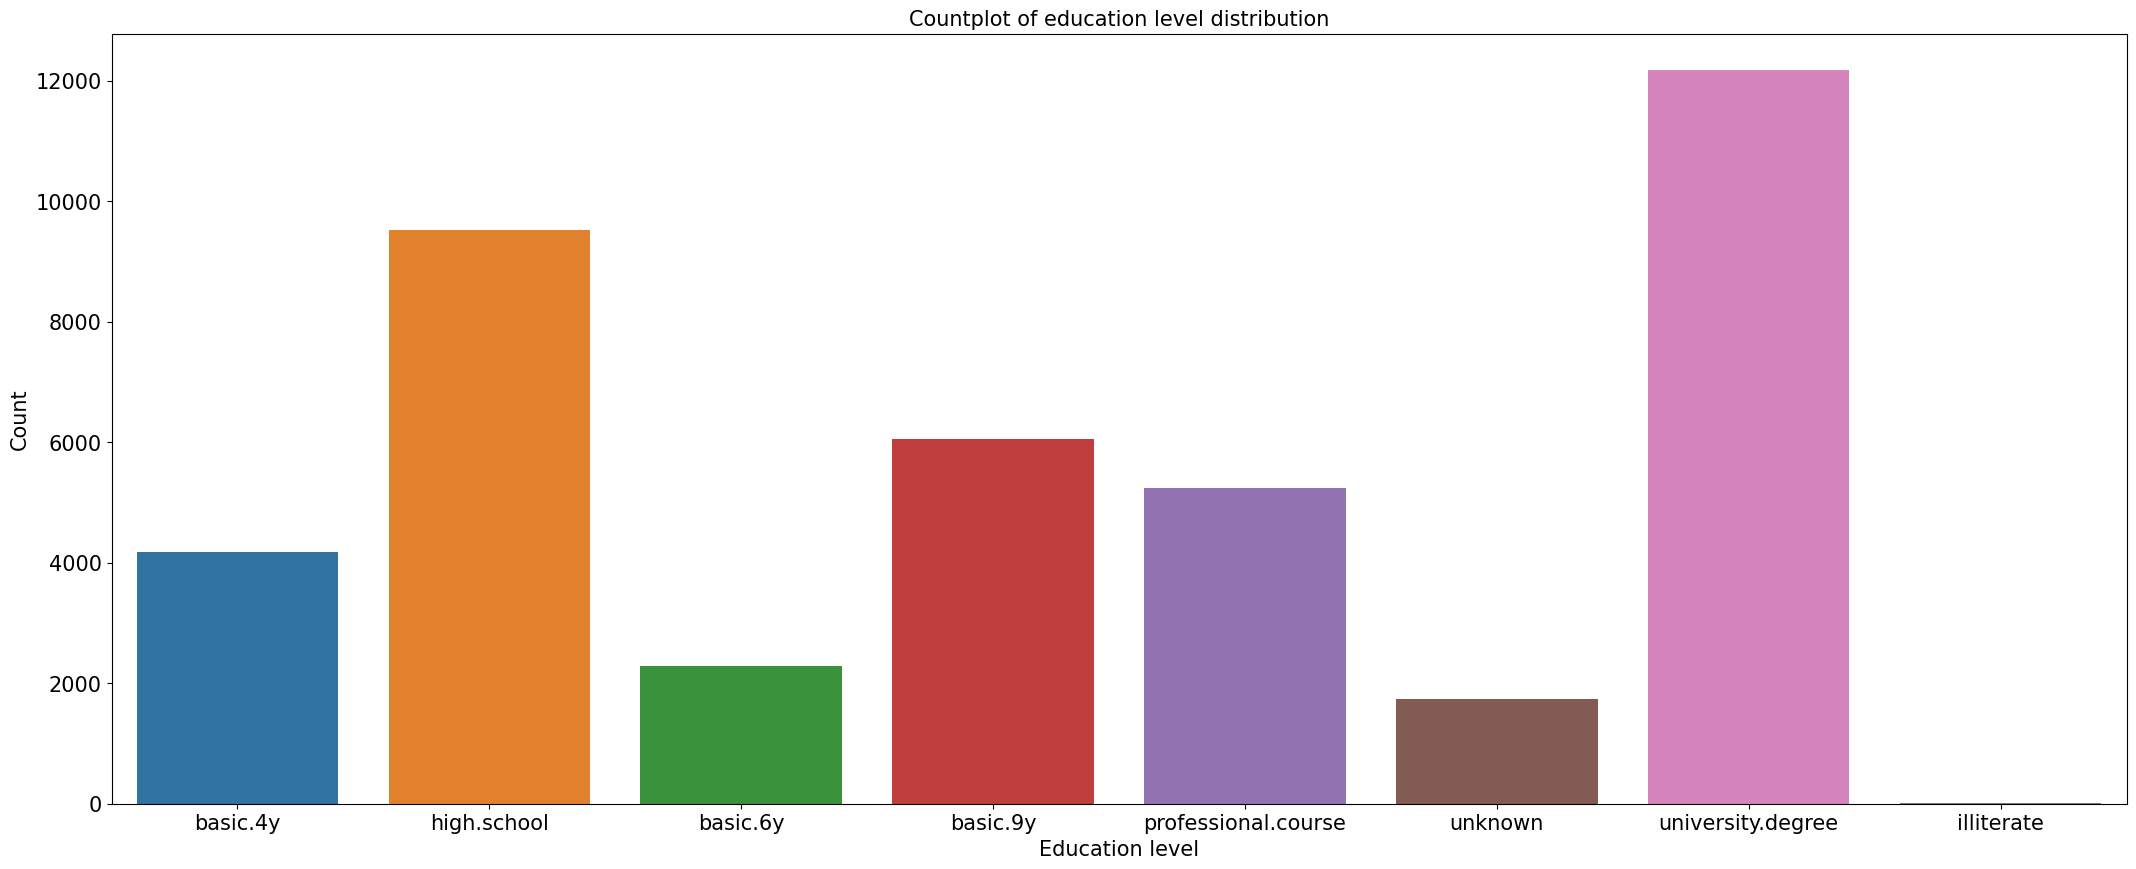

In [519]:
fig, ax = plt.subplots()
fig.set_size_inches(26, 10)
sns.countplot(x='education',data=df,hue='education')
ax.set_xlabel('Education level',fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.set_title('Countplot of education level distribution', fontsize=15)
ax.tick_params(labelsize=15)
plt.savefig('data/images/countplotofeducationlevels.png',dpi=100,bbox_inches = 'tight')

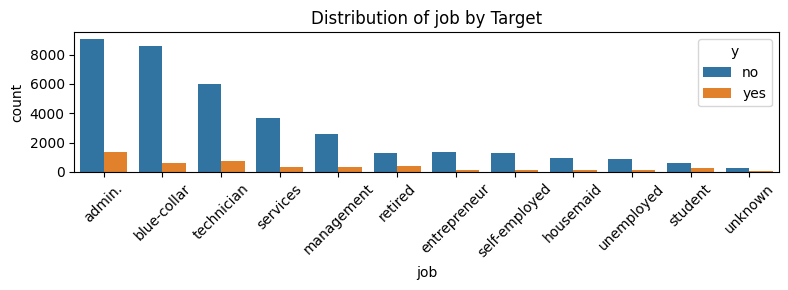

<Figure size 640x480 with 0 Axes>

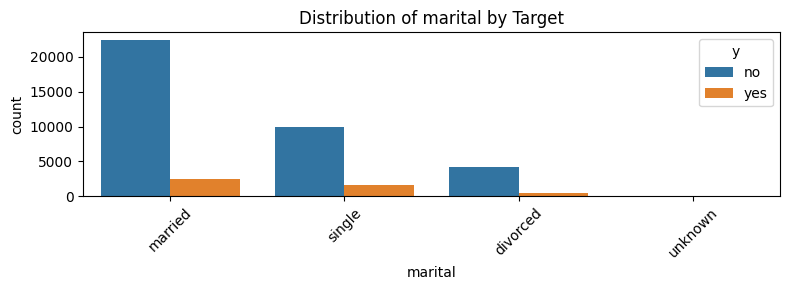

<Figure size 640x480 with 0 Axes>

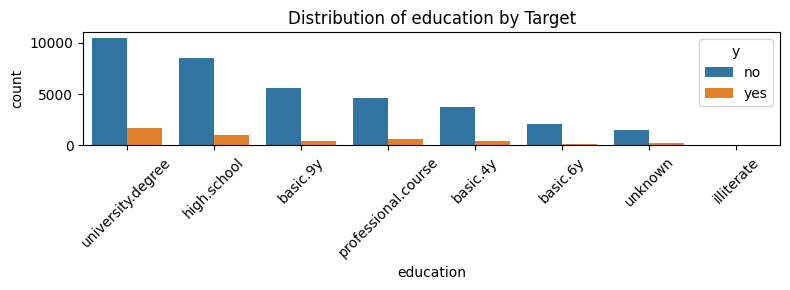

<Figure size 640x480 with 0 Axes>

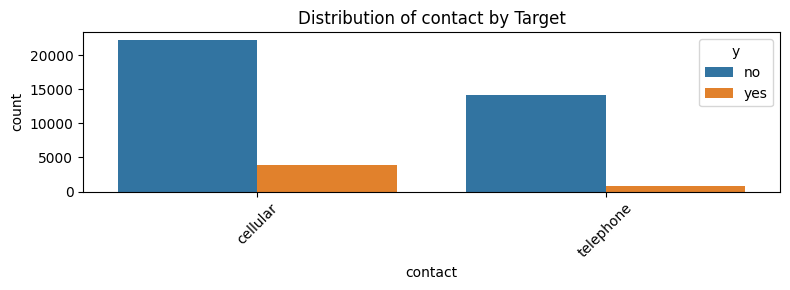

<Figure size 640x480 with 0 Axes>

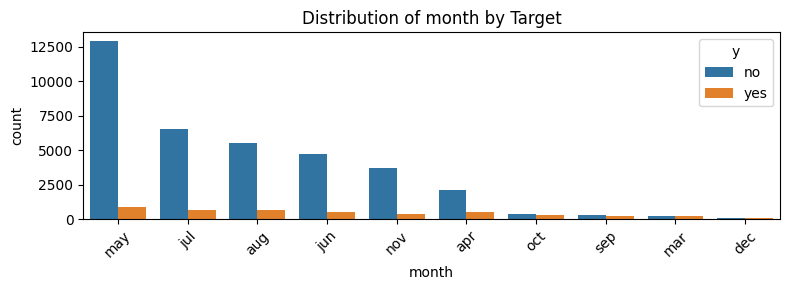

<Figure size 640x480 with 0 Axes>

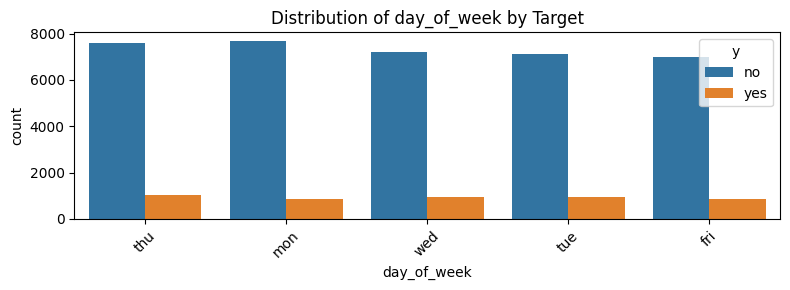

<Figure size 640x480 with 0 Axes>

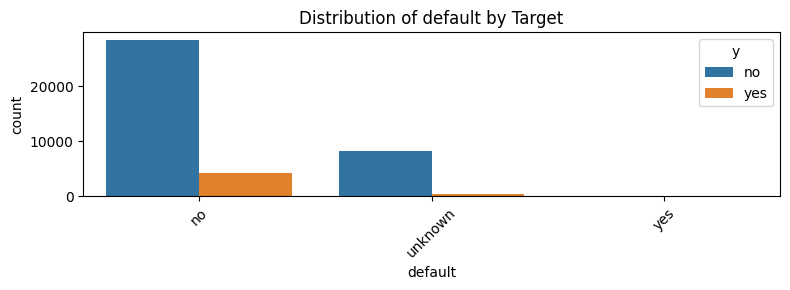

<Figure size 640x480 with 0 Axes>

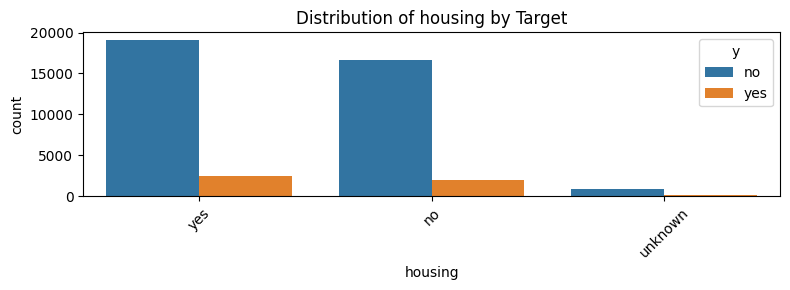

<Figure size 640x480 with 0 Axes>

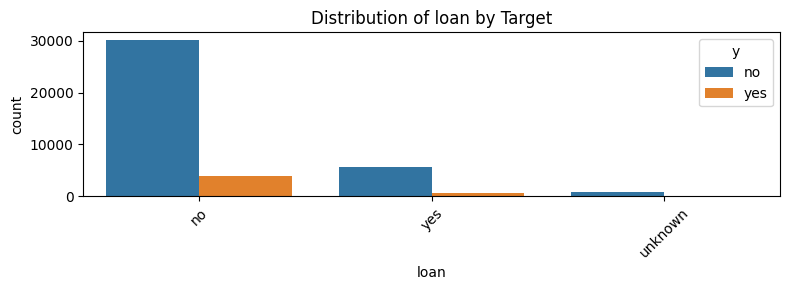

<Figure size 640x480 with 0 Axes>

In [520]:
# Plot distribution for selected categorical columns
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'default', 'housing', 'loan']

for col in categorical_cols:
    plt.figure(figsize=(8, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue="y")
    plt.title(f'Distribution of {col} by Target')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.savefig('data/images/distributionagainsty.png',dpi=100,bbox_inches = 'tight')

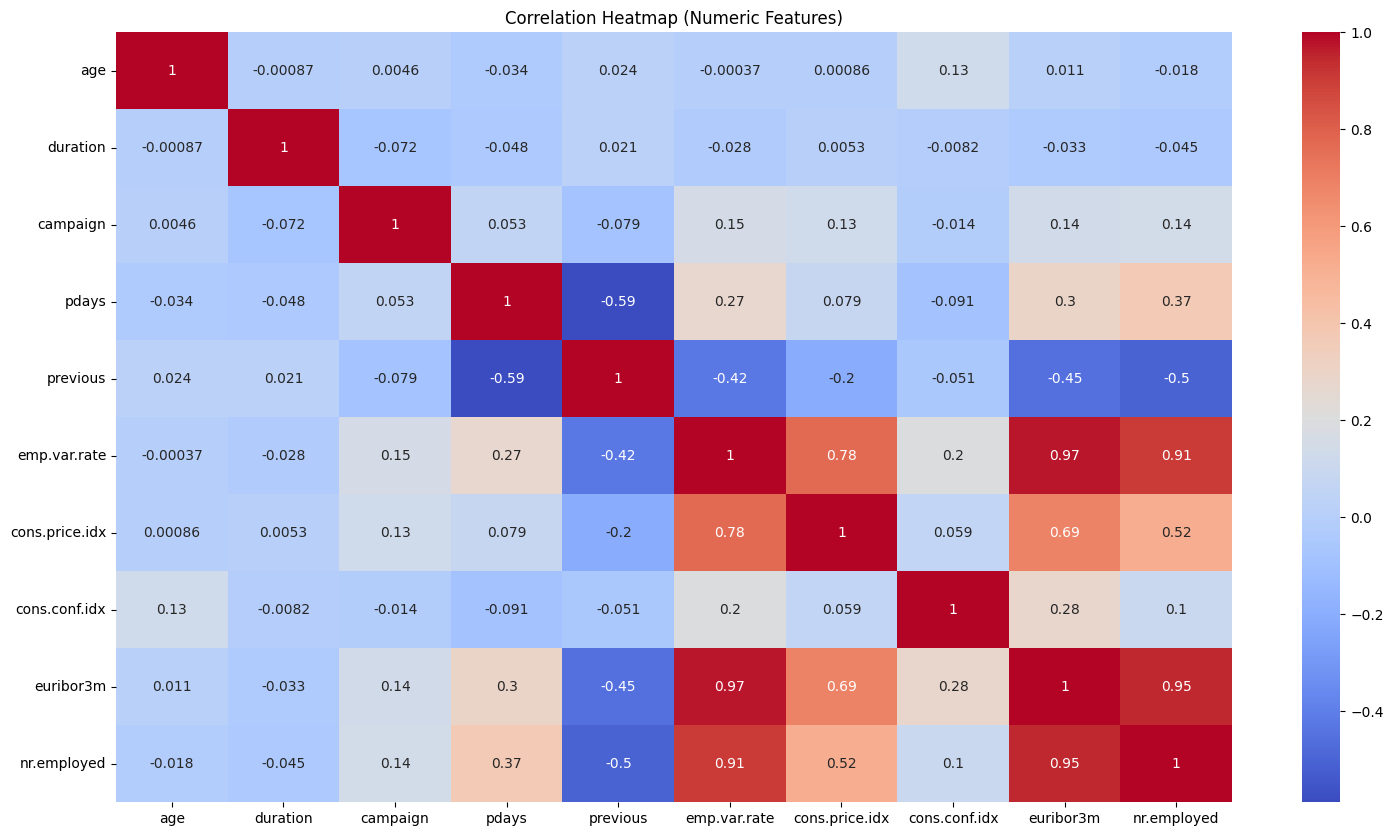

<Figure size 640x480 with 0 Axes>

In [521]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(18, 10))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()
plt.savefig('data/images/corrmap.png',dpi=100,bbox_inches = 'tight')

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The goal is a classification exercise to predict whether the client will subscribe a term deposit

In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [523]:
# Copy the original dataframe to avoid changing raw data
data = df.copy()

# 'duration' can cause data leakage; it's usually unknown at the time of prediction. We will drop it.
data.drop('duration', axis=1, inplace=True)

# Separate features and target
X = data.drop('y', axis=1)
y = data['y'].map({'no': 0, 'yes': 1})  # Convert target to binary

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scale numerical columns
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

# Final shapes
print("Processed features shape:", X_encoded.shape)
print("Target shape:", y.shape)

Processed features shape: (41188, 52)
Target shape: (41188,)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [524]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (32950, 52)
Test shape: (8238, 52)


In [525]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

#### It should have a baseline performance of at least 80% accuracy

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.

In [526]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
logpred = lr_model.predict(X_test)

print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(lr_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7217   93]
 [ 721  207]]
90.0


### Problem 9: Score the Model

What is the accuracy of your model?

In [527]:
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(lr_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7217   93]
 [ 721  207]]
90.0


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

#### Comparison of KNN, DT, SVM alongside LR model from earlier

In [528]:
# Initialize models with default settings
models = {
    "Logistic Regression": lr_model,
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Create a list to store the results
results_list = []

# Iterate through models, fit, score, and time
for model_name, model in models.items():
    # Fit the model and measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    # Make predictions and calculate accuracies
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    # Append results to the list
    results_list.append({
        "Model": model_name,
        "Train Time": round(train_time, 4),
        "Train Accuracy": round(train_accuracy, 4),
        "Test Accuracy": round(test_accuracy, 4)
    })

# Create the DataFrame
results_df = pd.DataFrame(results_list)

# Print the DataFrame
print(results_df)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression      0.0269          0.8998         0.9012
1                  KNN      0.0014          0.9115         0.8955
2        Decision Tree      0.1099          0.9954         0.8410
3                  SVM     26.1599          0.9092         0.9003


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.
- Adjust your performance metric

#### Not sure if this was a trick question but there was never a gender feature to begin with!

#### KNN model tuning

The optimal number of neighbors is 2 with 34.7%


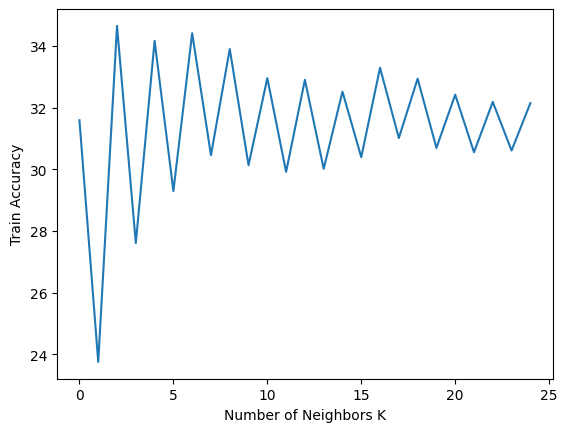

<Figure size 640x480 with 0 Axes>

In [529]:
# Create a range of neighbors to use with numpy
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

# Train the KNN model
for k in neighbors:
    neighbors_value = k+1
    knn = KNeighborsClassifier(n_neighbors = neighbors_value)
    kfold = model_selection.KFold()
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='f1')
    cv_scores.append(scores.mean()*100)

best_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (best_k, cv_scores[best_k]))

# Plot the number of neighbors against accuracy
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()
plt.savefig('data/images/tuned_knn_f1.png',dpi=100,bbox_inches = 'tight')

#### Making a prediction with the tuned model and checking it's accuracy score

In [530]:
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'f1').mean())

[[7207  103]
 [ 709  219]]
90.0


#### F1 scoring seems to achieve a similar score with the predictions using lesser n_neighbors vs accuracy score

##### Questions